In [1]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Calculate the mean squared error between two lists of data
def mse(ls1, ls2):
    if len(ls1) != len(ls2):
        print("Error: the input lists are of different length!")
        return 0
    else:
        n = len(ls1)
        sm = 0
        for i in range(0, n):
            sm += (ls1[i]-ls2[i])**2
        return sm/n

In [3]:
# Calculate the percentage error between two lists of data
def pe(ls1, ls2):
    if len(ls1) != len(ls2):
        print("Error: the input lists are of different length!")
        return 0
    else:
        n = len(ls1)
        sm = 0
        for i in range(0, n):
            sm += abs((ls1[i]-ls2[i])/ls2[i])*100
        return sm/n

In [4]:
# Extract the sign of a number
def sign(x):
    if x > 0:
        return 1
    elif x < 0:
        return -1
    else:
        return 0

In [5]:
# A flipped ReLU function
def flip_relu(x):
    if x < 0:
        return -1
    else:
        return 0

In [6]:
# Return the trading decisions based on the MACD signals
def dec(macd):
    
    decisions = []

    for i in range(1, len(macd)):
        dec_point = flip_relu(macd[i-1]*macd[i])
        decision = sign(dec_point*(macd[i-1] - macd[i]))
        decisions.append(decision)
            
    return decisions

In [7]:
# Import data generated by MACD with HEAAN Library and apple stock prices
df_macd_heaan = pd.read_csv('data/macd_heaan.csv', names=['Price'], header=None)
macd_heaan = df_macd_heaan.Price.tolist()

df_wma12_heaan = pd.read_csv('data/wma12_heaan.csv', names=['Price'], header=None)
wma12_heaan = df_wma12_heaan.Price.tolist()

df_wma26_heaan = pd.read_csv('data/wma26_heaan.csv', names=['Price'], header=None)
wma26_heaan = df_wma26_heaan.Price.tolist()

df_wmadiff_heaan = pd.read_csv('data/wma_diff_heaan.csv', names=['Price'], header=None)
wma_diff_heaan = df_wmadiff_heaan.Price.tolist()

df_wma9_heaan = pd.read_csv('data/wma9_heaan.csv', names=['Price'], header=None)
wma9_heaan = df_wma9_heaan.Price.tolist()

df_decisions_heaan = pd.read_csv('data/decisions_heaan.csv', names=['Decision'], header=None)
decisions_heaan = df_decisions_heaan.Decision.tolist()

df_apple = pd.read_csv('data/apple_prices.csv', names=['Price'], header=None)
apple = df_apple.Price.tolist()

# Ensure every list has the same length for comparison
wma12_heaan = wma12_heaan[9:]
wma26_heaan = wma26_heaan[9:]
apple = apple[35:(35+len(wma9_heaan))]

In [8]:
# Import data generated by MACD with HEAAN Library and apple stock prices
df_macd_seal = pd.read_csv('data/macd_seal.csv', names=['Price'], header=None)
macd_seal = df_macd_seal.Price.tolist()

df_wma12_seal = pd.read_csv('data/wma12_seal.csv', names=['Price'], header=None)
wma12_seal = df_wma12_seal.Price.tolist()

df_wma26_seal = pd.read_csv('data/wma26_seal.csv', names=['Price'], header=None)
wma26_seal = df_wma26_seal.Price.tolist()

df_wmadiff_seal = pd.read_csv('data/wma_diff_seal.csv', names=['Price'], header=None)
wma_diff_seal = df_wmadiff_seal.Price.tolist()

df_wma9_seal = pd.read_csv('data/wma9_seal.csv', names=['Price'], header=None)
wma9_seal = df_wma9_seal.Price.tolist()

df_decisions_seal = pd.read_csv('data/decisions_seal.csv', names=['Decision'], header=None)
decisions_seal = df_decisions_seal.Decision.tolist()

# Ensure every list has the same length for comparison
wma12_seal = wma12_seal[9:]
wma26_seal = wma26_seal[9:]

In [9]:
# Import data generated by MACD with Plaintext timeseries data
df_macd_plain = pd.read_csv('data/macd_wma.csv', names=['Price'], header=None)
macd_plain = df_macd_plain.Price.tolist()

df_wma12_plain = pd.read_csv('data/wma12.csv', names=['Price'], header=None)
wma12_plain = df_wma12_plain.Price.tolist()

df_wma26_plain = pd.read_csv('data/wma26.csv', names=['Price'], header=None)
wma26_plain = df_wma26_plain.Price.tolist()

df_wmadiff_plain = pd.read_csv('data/wma_diff.csv', names=['Price'], header=None)
wma_diff_plain = df_wmadiff_plain.Price.tolist()

df_wma9_plain = pd.read_csv('data/wma9.csv', names=['Price'], header=None)
wma9_plain = df_wma9_plain.Price.tolist()

df_decisions_plain = pd.read_csv('data/decisions_wma.csv', names=['Decision'], header=None)
decisions_plain = df_decisions_plain.Decision.tolist()

df_decisions_plain_approx = pd.read_csv('data/decisions_wma_approx.csv', names=['Decision'], header=None)
decisions_plain_approx = df_decisions_plain_approx.Decision.tolist()

In [10]:
# Calculate the trading decisions with dec function instead of the approximation approach for comparison
decisions_seal_norm = dec(macd_seal)
decisions_heaan_norm = dec(macd_heaan)

Mean Squared Error of WMA12-HEAAN:  8.112784651130855e-08
Mean Squared Error of WMA26-HEAAN:  7.460181477281736e-08
Mean Squared Error of WMA12-SEAL:  0.0001268937152591972
Mean Squared Error of WMA26-SEAL:  0.0001280192966260853
Percentage Error of WMA12-HEAAN:  0.00020 %
Percentage Error of WMA26-HEAAN:  0.00019 %
Percentage Error of WMA12-SEAL:  0.00916 %
Percentage Error of WMA26-SEAL:  0.00918 %


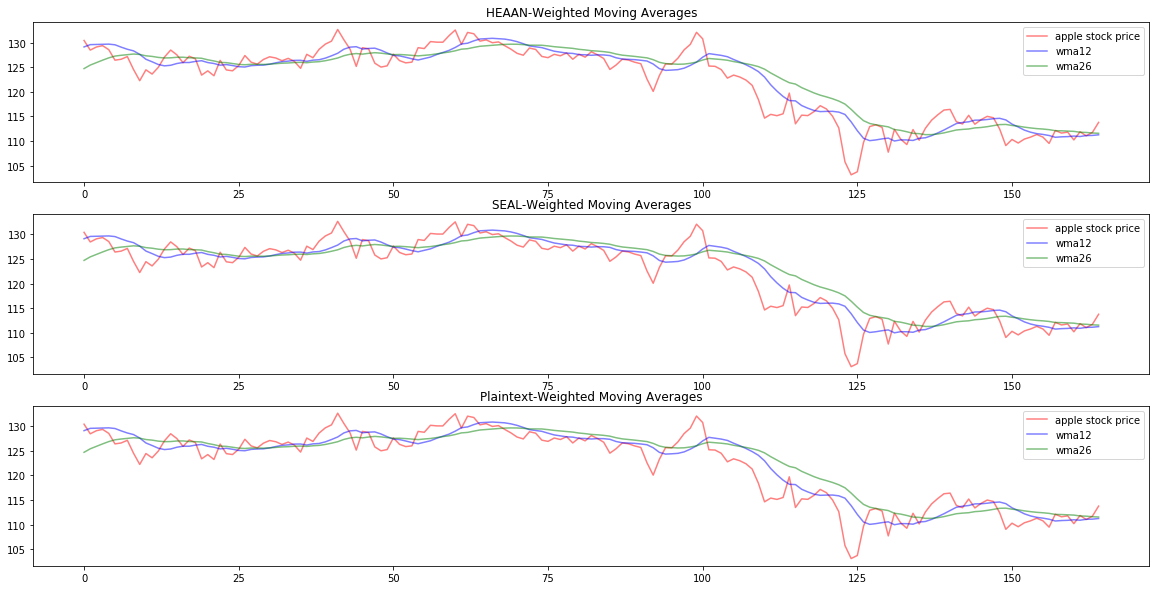

In [11]:
# Plot the weighted moving averages
fig, (ax1, ax2, ax3) = plt.subplots(3, figsize = (20, 10))

ax1.plot(apple, color='red', alpha=0.5, label='apple stock price')
ax1.plot(wma12_heaan, color='blue', alpha=0.5, label='wma12')
ax1.plot(wma26_heaan, color='green', alpha=0.5, label='wma26')
ax1.set_title('HEAAN-Weighted Moving Averages')
ax1.legend()

ax2.plot(apple, color='red', alpha=0.5, label='apple stock price')
ax2.plot(wma12_seal, color='blue', alpha=0.5, label='wma12')
ax2.plot(wma26_seal, color='green', alpha=0.5, label='wma26')
ax2.set_title('SEAL-Weighted Moving Averages')
ax2.legend()

ax3.plot(apple, color='red', alpha=0.5, label='apple stock price')
ax3.plot(wma12_plain, color='blue', alpha=0.5, label='wma12')
ax3.plot(wma26_plain, color='green', alpha=0.5, label='wma26')
ax3.set_title('Plaintext-Weighted Moving Averages')
ax3.legend()

mse_wma12_heaan = mse(wma12_heaan, wma12_plain)
mse_wma26_heaan = mse(wma26_heaan, wma26_plain)
mse_wma12_seal = mse(wma12_seal, wma12_plain)
mse_wma26_seal = mse(wma26_seal, wma26_plain)

pe_wma12_heaan = pe(wma12_heaan, wma12_plain)
pe_wma26_heaan = pe(wma26_heaan, wma26_plain)
pe_wma12_seal = pe(wma12_seal, wma12_plain)
pe_wma26_seal = pe(wma26_seal, wma26_plain)

print("Mean Squared Error of WMA12-HEAAN: ", mse_wma12_heaan)
print("Mean Squared Error of WMA26-HEAAN: ", mse_wma26_heaan)
print("Mean Squared Error of WMA12-SEAL: ", mse_wma12_seal)
print("Mean Squared Error of WMA26-SEAL: ", mse_wma26_seal)

print("Percentage Error of WMA12-HEAAN: ", "%.5f" % pe_wma12_heaan, "%")
print("Percentage Error of WMA26-HEAAN: ", "%.5f" % pe_wma26_heaan, "%")
print("Percentage Error of WMA12-SEAL: ", "%.5f" % pe_wma12_seal, "%")
print("Percentage Error of WMA26-SEAL: ", "%.5f" % pe_wma26_seal, "%")

plt.show()

Mean Squared Error of MACD-HEAAN:  2.0166801439459054e-12
Mean Squared Error of MACD-SEAL:  1.7423290175083518e-07
Percentage Error of MACD-HEAAN:  0.00020 %
Percentage Error of MACD-SEAL:  0.14420 %


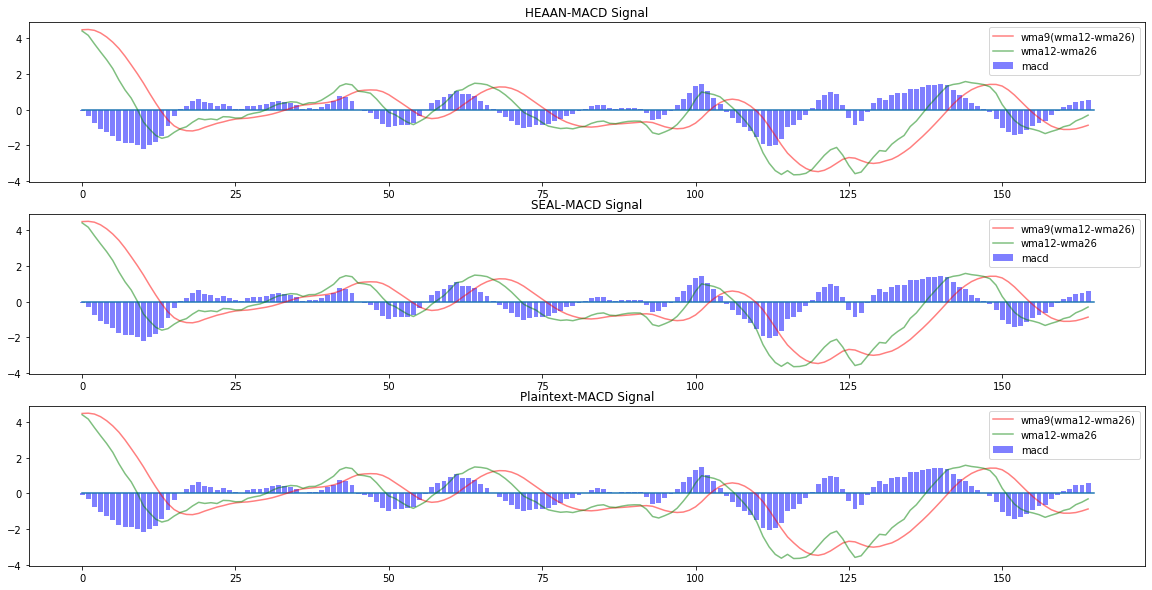

In [12]:
# Plot the MACD signals
fig, (ax1, ax2, ax3) = plt.subplots(3, figsize = (20, 10))

x_range_heaan = np.arange(0, len(macd_heaan), 1)
x_heaan, y_heaan = [0, len(macd_heaan)], [0, 0]
ax1.plot(x_heaan, y_heaan)
ax1.bar(x_range_heaan, macd_heaan, color='blue', alpha=0.5, label='macd')
ax1.plot(wma9_heaan, color='red', alpha=0.5, label='wma9(wma12-wma26)')
ax1.plot(wma_diff_heaan, color='green', alpha=0.5, label='wma12-wma26')
ax1.set_title('HEAAN-MACD Signal')
ax1.legend()

x_range_seal = np.arange(0, len(macd_seal), 1)
x_seal, y_seal = [0, len(macd_seal)], [0, 0]
ax2.plot(x_seal, y_seal)
ax2.bar(x_range_seal, macd_seal, color='blue', alpha=0.5, label='macd')
ax2.plot(wma9_seal, color='red', alpha=0.5, label='wma9(wma12-wma26)')
ax2.plot(wma_diff_seal, color='green', alpha=0.5, label='wma12-wma26')
ax2.set_title('SEAL-MACD Signal')
ax2.legend()

x_range_plain = np.arange(0, len(macd_plain), 1)
x_plain, y_plain = [0, len(macd_plain)], [0, 0]
ax3.plot(x_plain, y_plain)
ax3.bar(x_range_plain, macd_plain, color='blue', alpha=0.5, label='macd')
ax3.plot(wma9_plain, color='red', alpha=0.5, label='wma9(wma12-wma26)')
ax3.plot(wma_diff_plain, color='green', alpha=0.5, label='wma12-wma26')
ax3.set_title('Plaintext-MACD Signal')
ax3.legend()

mse_macd_heaan = mse(macd_heaan, macd_plain)
mse_macd_seal = mse(macd_seal, macd_plain)

pe_macd_heaan = pe(macd_heaan, macd_plain)
pe_macd_seal = pe(macd_seal, macd_plain)

print("Mean Squared Error of MACD-HEAAN: ", mse_macd_heaan)
print("Mean Squared Error of MACD-SEAL: ", mse_macd_seal)

print("Percentage Error of MACD-HEAAN: ", "%.5f" % pe_macd_heaan, "%")
print("Percentage Error of MACD-SEAL: ", "%.5f" % pe_macd_seal, "%")

plt.show()

Mean Squared Error of decisions-HEAAN:  9.819137619597537e-16
Mean Squared Error of decisions-SEAL:  6.448654438143117e-10
Percentage Error of decisions-HEAAN:  0.03794 %
Percentage Error of decisions-SEAL:  3.19030 %


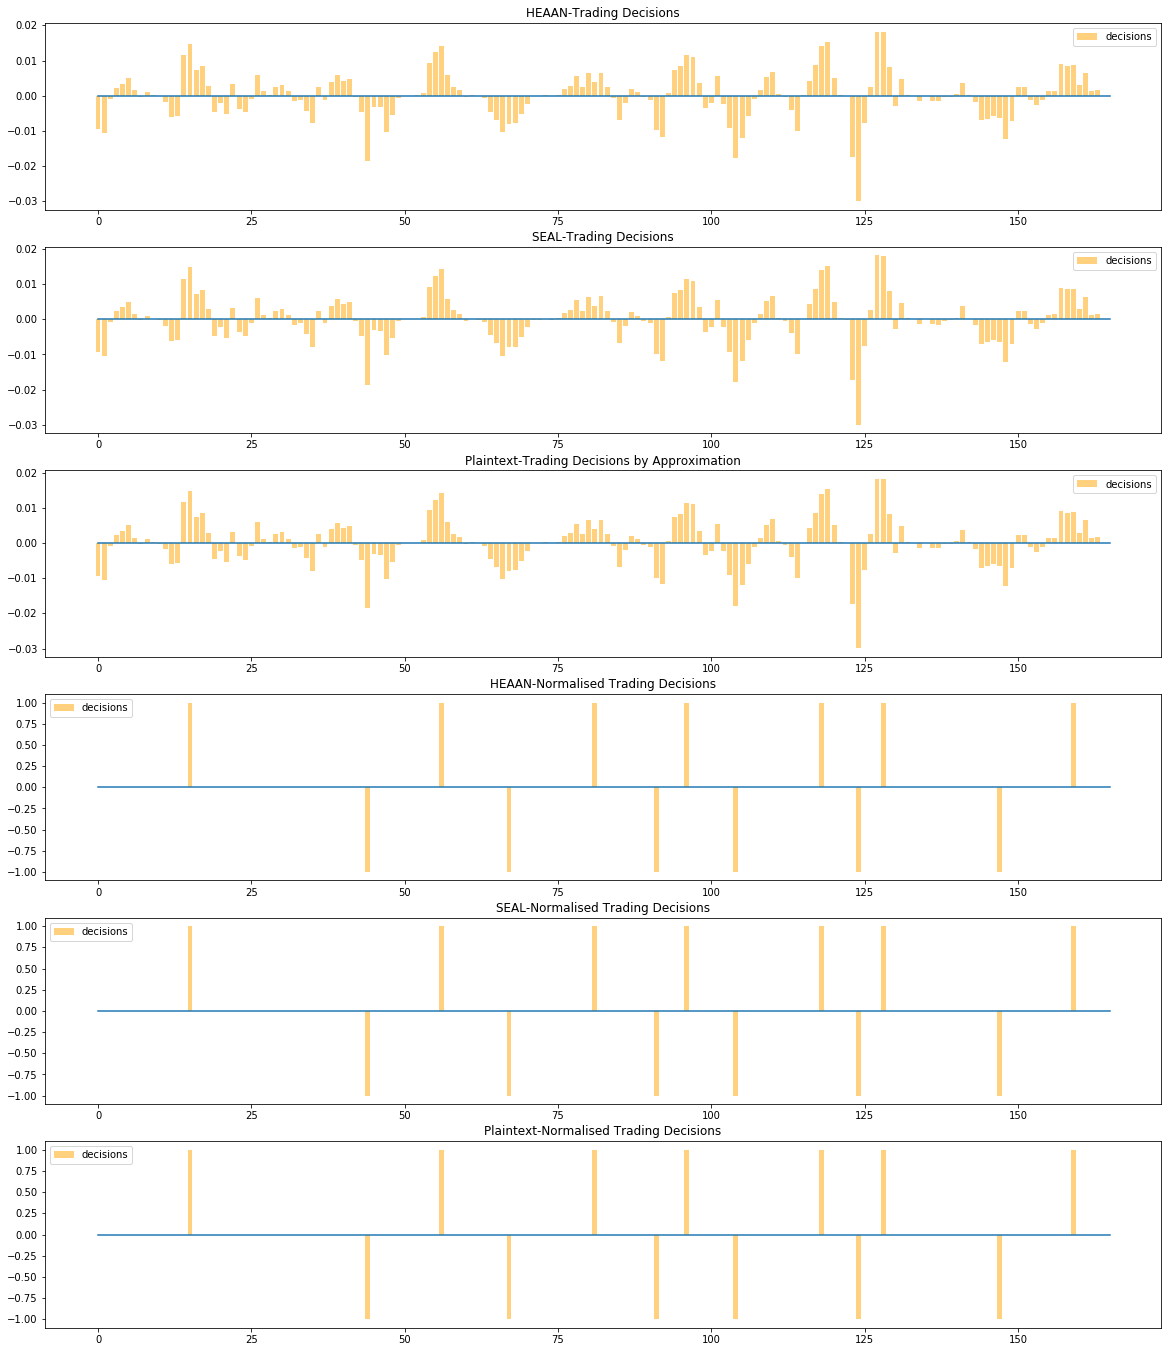

In [13]:
# Plot the trading decisions
fig, (ax1, ax2, ax3, ax4, ax5, ax6) = plt.subplots(6, figsize = (20, 24))

x_range2_heaan = np.arange(0, len(decisions_heaan), 1)
x_heaan, y_heaan = [0, len(macd_heaan)], [0, 0]
ax1.bar(x_range2_heaan, decisions_heaan, color='orange', alpha=0.5, label='decisions')
ax1.plot(x_heaan, y_heaan)
ax1.set_title('HEAAN-Trading Decisions')
ax1.legend()

x_range2_seal = np.arange(0, len(decisions_seal), 1)
x_seal, y_seal = [0, len(macd_seal)], [0, 0]
ax2.bar(x_range2_seal, decisions_seal, color='orange', alpha=0.5, label='decisions')
ax2.plot(x_seal, y_seal)
ax2.set_title('SEAL-Trading Decisions')
ax2.legend()

x_range2_plain = np.arange(0, len(decisions_plain), 1)
x_plain, y_plain = [0, len(macd_plain)], [0, 0]
ax3.bar(x_range2_plain, decisions_plain_approx, color='orange', alpha=0.5, label='decisions')
ax3.plot(x_plain, y_plain)
ax3.set_title('Plaintext-Trading Decisions by Approximation')
ax3.legend()

ax4.bar(x_range2_heaan, decisions_heaan_norm, color='orange', alpha=0.5, label='decisions')
ax4.plot(x_heaan, y_heaan)
ax4.set_title('HEAAN-Normalised Trading Decisions')
ax4.legend()

ax5.bar(x_range2_seal, decisions_seal_norm, color='orange', alpha=0.5, label='decisions')
ax5.plot(x_seal, y_seal)
ax5.set_title('SEAL-Normalised Trading Decisions')
ax5.legend()

ax6.bar(x_range2_plain, decisions_plain, color='orange', alpha=0.5, label='decisions')
ax6.plot(x_plain, y_plain)
ax6.set_title('Plaintext-Normalised Trading Decisions')
ax6.legend()

mse_decisions_heaan = mse(decisions_heaan, decisions_plain_approx)
mse_decisions_seal = mse(decisions_seal, decisions_plain_approx)

pe_decisions_heaan = pe(decisions_heaan, decisions_plain_approx)
pe_decisions_seal = pe(decisions_seal, decisions_plain_approx)

print("Mean Squared Error of decisions-HEAAN: ", mse_decisions_heaan)
print("Mean Squared Error of decisions-SEAL: ", mse_decisions_seal)

print("Percentage Error of decisions-HEAAN: ", "%.5f" % pe_decisions_heaan, "%")
print("Percentage Error of decisions-SEAL: ", "%.5f" % pe_decisions_seal, "%")

plt.show()